# Training the Model

From 3.Building a Neural Network notebook

In [ ]:
import torch
import torchvision
from torchvision import transforms , datasets
import torch.nn as nn
import torch.nn.functional as F


train = datasets.MNIST("",
                       train = True,
                       download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",
                      train = False,
                      download = True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size =10,shuffle =True)
testset = torch.utils.data.DataLoader(test,batch_size =10,shuffle =True)

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,64)
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x,dim =1)

net = Net()

### Loss and optimizers

* **Loss** is a measure of how wrong the output is
* **Optimizers** adjusts the weight based on the loss, so as to lower the loss, slowly over time, based on the learning rate that we use



### **Learning Rate**
 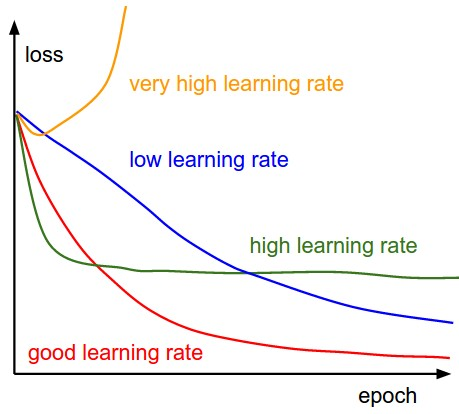

Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge — especially if we get stuck on a plateau region.

**EPOCHS**

The number of epochs is a hyperparameter that defines the number times that the
learning algorithm will work through the entire training dataset. One epoch 
means that each sample in the training dataset has had an opportunity to 
update the internal model parameters.

In [ ]:
import torch.optim as optim

"""
net.parameters() corressponds to everything that is adjustable in our model
lr is the learning rate

"""
optimizer = optim.Adam(net.parameters(),lr = 0.001)

EPOCHS = 3

In [ ]:
for epochs in range(EPOCHS):
  for data in trainset:
    #data is a batch of featureset and labels
    x,y = data

    #zero_grad Sets gradients of all model parameters to zero.
    net.zero_grad()
    
    output = net(x.view(-1,28*28))
    
    #calculating The negative log likelihood loss.
    loss = F.nll_loss(output,y)
    
    #backpropagate the loss
    loss.backward()

    #adjusts the weights for us
    optimizer.step()
  print(loss)


tensor(0.0575, grad_fn=<NllLossBackward>)
tensor(0.0081, grad_fn=<NllLossBackward>)
tensor(0.0220, grad_fn=<NllLossBackward>)


### Check the accuracy of the model


In [ ]:
correct = 0
total = 0

"""
Disabling gradient calculation is useful for inference, when you are sure
that you will not call Tensor.backward(). It will reduce memory
consumption for computations that would otherwise have requires_grad=True.

In this mode, the result of every computation will have
requires_grad=False, even when the inputs have requires_grad=True.

This mode has no effect when using ~enable_grad context manager .

This context manager is thread local; it will not affect computation
in other threads.
"""

with torch.no_grad():
  for data in trainset:
    x,y = data
    output = net(x.view(-1,28*28))
    for index,i in enumerate(output):
      if torch.argmax(i) == y[index]:
        correct += 1
      total += 1

print(f"Accuracy : {(correct/total) * 100}")


Accuracy : 97.84833333333334


### Checking the output

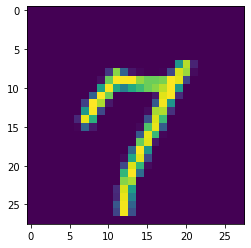

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x[1].view(28,28))

In [ ]:
print(torch.argmax(output[1]))

tensor(7)
